# **Tensor Manipulation in Pytorch**

<a target="_blank" href="https://colab.research.google.com/github/patrick-batman/Mosaic-24/blob/main/workshop3-pytorch/Workshop_3_NN_MOASIC'24.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### **Tensor Initialization**

In [ ]:
import torch

if torch.cuda.is_available():
  device = "cuda"
elif torch.backends.mps.is_available():
  device = "mps"
else:
  device = "cpu"
  
print(device)

In [ ]:
my_tensor = torch.tensor([[1,2,3] ,
                          [4,5,6]] , dtype= torch.float32, device=device , requires_grad=True )

print(my_tensor)
print(my_tensor.dtype)
print(my_tensor.device)
print(my_tensor.shape)
print(my_tensor.requires_grad)

In [ ]:
x = torch.empty(size=(3,3)) #uninitialized
# x = torch.zeros((3,3)) #zeroes
# x = torch.rand((3,3)) #random values(gaussian)
# x = torch.ones((3,3)) #all ones
# x = torch.eye(3)
print(x)

In [ ]:
x = torch.empty(size=(1,5)).normal_(mean=0 , std=1)
print(x)
x = torch.empty(size=(1,5)).uniform_(0,1)
print(x)

In [ ]:
import numpy as np
np_array = np.zeros((5,5))
print(np_array)
tensor = torch.from_numpy(np_array)
print(tensor)
np_array_back = tensor.numpy()
print(np_array_back)

### **Tensor Math**

In [ ]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([9, 8, 7])

In [ ]:
z = torch.add(x,y)
print(z)

In [ ]:
z = x+y
print(z)

In [ ]:
#  division

z = torch.true_divide(x, y)
# if x and y are of same shape, each element is divided by corresponding element
print(z)

print(torch.true_divide(x, 2))
# each element of x is divided by 2

In [ ]:
# inplace operations
t = torch.zeros(3)
t.add_(x)
# any operation followd by _ means it is done inplace

t += x #inplace
t = t+x  #it is not inplace, it creates a copy first

In [ ]:
# exponentiation
z = x.pow(2)
print(z)

z =  x**2
print(z)

In [ ]:
# Simple Comparision
z = x > 0
print(z)

In [ ]:
#Matrix Multiplication

x1 = torch.rand((2,5)) # 2x5
x2 = torch.rand((5,3)) # 5x3

x3 = torch.mm(x1, x2) # 2x3
print(x3)

x3 = x1 @ x2
print(x3)

x3 = x1.mm(x2)
print(x3)

In [ ]:
# Matrix Exponentiation

Q = torch.rand((5,5))
print(Q.matrix_power(3))

In [ ]:
# Element wise multiplication

z = x * y
print(x)
print(y)
print(z)

In [ ]:
# Dot product
z = torch.dot(x,y)
print(z)

z = x @ y
print(z)

In [ ]:
# Batch matrix multiplication
batch = 32
n = 10
m = 20
p = 30

tensor1 = torch.rand((batch, n, m))
tensor2 = torch.rand((batch, m, p))

torch.bmm(tensor1 , tensor2).size() # (batch , n , p)

## Broadcasting
It is is one of the most interesting topics in any tensor based framework. For more practice; checkout [Tensor-puzzles](https://github.com/srush/Tensor-Puzzles).

In [ ]:
# Broadcasting

x1 = torch.rand((5,5)) # 5x5
x2 = torch.rand((1,5)) # 1x5

print(x1)
print(x2)

z = x1 - x2     # each row of x1 is subtracted by x2
print(z)

Z = x1 ** x2   #each row of x1 is element wise raised tby x2


In [ ]:
print(x)
sum_x = torch.sum(x , dim=0)
print(sum_x)

In [ ]:
torch.max(x , dim=0)


In [ ]:
print(x)
values , indices = torch.min(x , dim = 0)
print(values , indices)

In [ ]:
z = torch.argmax(x , dim=0)
print(z)
# return the index of max argument

In [ ]:
mean_x = torch.mean(x.float() , dim = 0)
print(mean_x)


In [ ]:
print(y)
sorted_y , indices = torch.sort(y , dim=0 , descending=False)
print(sorted_y , indices)

In [ ]:
Q = torch.tensor([12, 15, 18])
print(torch.clamp(Q , min=13))
print(torch.clamp(Q , max=17))

#set the max/min value in a tensor

### **Tensor Indexing**

In [ ]:
batch_size = 10
features = 25
x = torch.rand((batch_size , features))

In [ ]:
print(x[0].shape) # x[0,:]
print(x[:, 0].shape)


print(x.shape[0])
print(x.shape[1])

In [ ]:
print(x)
print(x[2 , 0:10])

In [ ]:
x = torch.arange(10)
print(x)
indices = [2,5,8]

print(x[indices])

In [ ]:
# advanced Indexing

x = torch.arange(10)
print(x)

print( x[(x<2) | (x>8)] )
print( x[(x<2) & (x>8)] )
print( x[x.remainder(2) == 0] )

In [ ]:
print(torch.where(x>5 , x , x*2))
# if x>5 then x else x*2

In [ ]:
print(torch.tensor([0,0,1,2,2,3,4]).unique())

### **Tensor Reshaping**

In [ ]:
x = torch.arange(9)
print(x)

In [ ]:
x_3x3 = x.view(3,3)
print(x_3x3)
x_3x3_ = x.reshape(3,3)
print(x_3x3_)

# view acts on contiguous tensors
# reshape -> does not matters -> always works but performance loss

In [ ]:
y = x_3x3.t()
# transpose of a tensor
print(y)

In [ ]:
y.view(9)
# y is transpose of x and is not contiguous, so view() can not be used

In [ ]:
y.reshape(9)

In [ ]:
y.contiguous().view(9)

In [ ]:
x1 = torch.rand((2,5))
x2 = torch.rand((2,5))
print(torch.cat((x1,x2) , dim=0).shape) # join in x dimension 0
print(torch.cat((x1,x2) , dim=1).shape) # join in x dimension 1

In [ ]:
z = x1.reshape(-1)
print(z.shape)

In [ ]:
batch = 64
x = torch.rand((batch , 2, 5))

z = x.view(batch , -1)
print(z.shape)

In [ ]:
z = x.permute(0 , 2 , 1)
# permutate the dimensions of tensor
print(z.shape)

In [ ]:
x = torch.arange(10)

print(x.unsqueeze(0).shape)
print(x.unsqueeze(1).shape)


In [ ]:
x = torch.arange(10).unsqueeze(1).unsqueeze(0)
# [10] -> [10, 1] -> [1, 10, 1]
print(x.shape)

In [ ]:
x = torch.arange(10).unsqueeze(0).unsqueeze(1)
# [10] -> [1, 10] -> [1, 1, 10]
print(x.shape)

In [ ]:
z = x.squeeze(1)
print(z.shape)

# **Importing the libraries**


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm

# **Knowing our Dataset**

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [ ]:
len(mnist_trainset)

In [ ]:
train_image, train_target = mnist_trainset[0]

In [ ]:
train_image


In [ ]:
print(train_target)

In [ ]:
# number of classes of dataset
mnist_trainset.classes

# **Hyperparameters**




In [ ]:
input_size = 784  # 28X28
num_classes = 10  # dataset has 10 classes
learning_rate = 0.001
batch_size = 64
num_epochs = 10

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}")

# **Loading the data**

In [ ]:
# Load data

train_dataset = datasets.MNIST(root='datasets/' , train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='datasets/' , train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# **Neural Network**

## **A basic Artificial neural network will be in a form of**

**Input layer –** To get the data from the user or a client or a server to analyze and give the result.

**Hidden layers –** This layer can be in any number and these layers will analyze the inputs with passing through them with different biases, weights, and activation functions to provide an output

**Output Layer –** This is where we can get the result from a neural network.

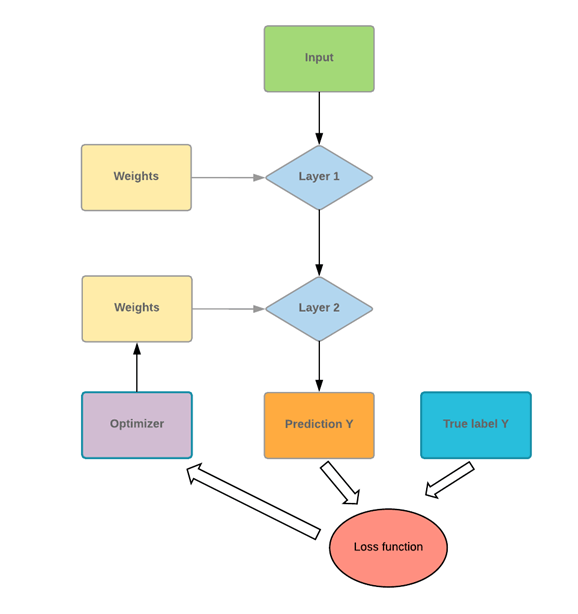

## **Building a model**

Some of the features that determine the quality of our neural network are:



1.   Layers
2.   Activation function

1.   Loss function
2.   Optimizer






## **Activation function**
Activation functions are simply mathematical methods that bring all the values inside a range of 0 to 1 so that it will be very easier for the machine to learn the data in its process of analyzing the data. There are a variety of activation functions that are supported by the Tensor flow. Some of the commonly used functions are,

* Sigmoid

* Relu

* Softmax

* Swish

* Linear

## **Losses**
Loss functions are a very important thing to notice while creating a neural network because loss functions in the neural network will calculate the difference between the predicted output and the actual result and greatly help the optimizers in the neural nets to update the weights on its backpropagation.

There are many loss functions that were supported by the Pytorch library, and again commonly used few are,

* Mean Absolute

* MeanSquaredError

* Binary Crossentropy
* Categorical Crossentropy
* Sparse Categorical Crossentropy

## **Optimizers**
Optimizers are a very important thing because this is the function that helps the neural network to change the weights on the backpropagation so that the difference between the actual and predicted result will decrease at a gradual pace and obtain that point where the loss is very minimum and the model is able to predict more accurate results.

Again Pytorch supports many optimizers to mention a few,

* Gradient descent
* SDG – Stochastic Gradient Descent
* Adagrad
* Adam

In [ ]:
# Creating the model
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
# Initialize Network

model = NN(input_size=input_size, num_classes=num_classes).to(device)

In [ ]:
# Loss and Optimizer

critetion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr=learning_rate)

In [ ]:
# Train Network

for epoch in range(num_epochs):

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)
    for batch_idx, (data, targets) in enumerate(progress_bar):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Get to correct shape
        data = data.reshape(data.shape[0], -1)

        # forward prop
        scores = model(data)

        # calculate loss
        loss = critetion(scores, targets)

        # backward prop
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

## **Evaluating the model**

In [ ]:
# Check accuracy on training & test to see how good our model

def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")

    num_correct = 0
    num_samples = 0

    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)

            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')

    model.train()

In [ ]:
# Evaluating the model
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

## **Saving and Loading Model**

In [ ]:
def save_checkpoint(state , filename="my_checkpoint.pth.tar"):
    print("=> Saving Checkpoint")
    torch.save(state , filename)


In [ ]:
def load_checkpoint(checkpoint):
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

# **Improving the model**

Model complexity can be increased by increasing the number of nidden layers, which makes it less prone to underfitting.<br>
Regularization can be introduced to overcome overfitting of the model.

In [ ]:
class NN_better(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 100),
            nn.ReLU(),
            nn.Linear(100, num_classes),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NN_better(input_size=input_size, num_classes=num_classes).to(device)
print(model)


In [ ]:
optimizer = optim.Adam(model.parameters() , lr=learning_rate, weight_decay=0.001)
# This weight decay is for L2 regularization

In [ ]:
# Train Network again with regularization

for epoch in range(num_epochs):

    # saving model
    # if (epoch+1)%2 == 0:
    #     checkpoint = {'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
    #     save_checkpoint(checkpoint)

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)
    for batch_idx, (data, targets) in enumerate(progress_bar):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Get to correct shape
        data = data.reshape(data.shape[0], -1)

        # forward prop
        scores = model(data)

        # calculate loss
        loss = critetion(scores, targets)

        # backward prop
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

In [ ]:
# Evaluating the model With Regularization
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

# **Modify Preloaded Model**

In [ ]:
#  Load Model and Modify it
import torchvision
model = torchvision.models.vgg16(pretrained=True).to(device)
print(model)

In [ ]:
# do nothing
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def foward(self, x):
        return x

In [ ]:
# freeze all the layers so that their weights does not change during training
for param in model.parameters():
    param.requires_grad = False

In [ ]:
model.avgpool = Identity()

model.classifier = nn.Sequential(nn.Linear(512, 100),
                                    nn.ReLU(),
                                    nn.Linear(100, 10))
print(model)

# we can change specific layer of classifier using
# model.classifier[6] = nn.Linear(4096, 10)

**Now only last layers will train and other layers will be freezed**

# **Creating a Custom Dataset for your files**

A custom Dataset class must implement three functions: \_\_init__, \_\_len__, and \_\_getitem__. Take a look at this implementation; the images are stored in a directory , and their labels are stored separately in a CSV file.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import Dataset, DataLoader
import os
from skimage import io
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset from custom data

# data labels is in csv file

class CatsandDogsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.join(self.root_dir, self.annotation.iloc[index,0])
        image = io.imreadd(img_path)
        y_label =torch.tensor(int(self.annotation.iloc[index,1]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)



In [ ]:
# Load Data
Dataset = CatsandDogsDataset(csv_file='/content/drive/MyDrive/CATS_AND_DOGS/cats_dogs.csv', root_dir='/content/drive/MyDrive/CATS_AND_DOGS/cats_dogs_resized', transform=transforms.ToTensor())

# Split Data
custom_train_set, custom_test_set = torch.utils.data.random_split(Dataset, [8, 2])

custom_train_loader = DataLoader(dataset=custom_train_set, batch_size=32, shuffle=True)
custom_test_loader = DataLoader(dataset=custom_test_set, batch_size=32, shuffle=True)
